#       Sales Data Analytics Project (Pandas & Matplotlib)


**Role**: Data Analyst

**Objective**: Perform end-to-end sales data analysis using SuperStore CSV data.

**Tools Used**: Pandas, Matplotlib

**Environment**: Google Colab

In [ ]:
# 1. Import Required Libraries

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True


In [ ]:
# 2. Load Sales Dataset (CSV)

df = pd.read_csv("/content/SuperStore Sales DataSet 1(Sheet1) (1).csv", encoding="cp1252")
df.head()


,Order Date,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Payment Mode
0,01-01-2019,Gaithersburg,Maryland,East,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,Online
1,02-01-2019,Gaithersburg,Maryland,East,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,Online
2,02-01-2019,Gaithersburg,Maryland,East,Technology,Phones,GE 30522EE2,231.98,2,67.2742,Cards
3,03-01-2019,Los Angeles,California,West,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,Online
4,03-01-2019,San Antonio,Texas,Central,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,Online


In [ ]:
# 3. Dataset Overview

df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    5901 non-null   object 
 1   City          5901 non-null   object 
 2   State         5901 non-null   object 
 3   Region        5901 non-null   object 
 4   Category      5901 non-null   object 
 5   Sub-Category  5901 non-null   object 
 6   Product Name  5901 non-null   object 
 7   Sales         5901 non-null   float64
 8   Quantity      5901 non-null   int64  
 9   Profit        5901 non-null   float64
 10  Payment Mode  5901 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 507.2+ KB


,Order Date,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Payment Mode
count,5901,5901,5901,5901,5901,5901,5901,5901.000000,5901.000000,5901.000000,5901
unique,643,452,49,4,3,17,1742,NaN,NaN,NaN,3
top,05-09-2019,New York City,California,West,Office Supplies,Binders,Easy-staple paper,NaN,NaN,NaN,COD
freq,38,563,1189,1901,3569,915,27,NaN,NaN,NaN,2453
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.345589,3.781901,29.700408,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,474.260645,2.212917,259.589138,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.836000,1.000000,-6599.978000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.976000,2.000000,1.795500,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.648000,3.000000,8.502500,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.170000,5.000000,28.615000,NaN


In [ ]:
# 4. Data Cleaning

df = df.drop_duplicates()
df = df.dropna()
df.shape


(5901, 11)

In [ ]:
# 5. Total Sales Analysis

total_sales = df["Sales"].sum()
print("Total Sales:", total_sales)


Total Sales: 1565804.3232


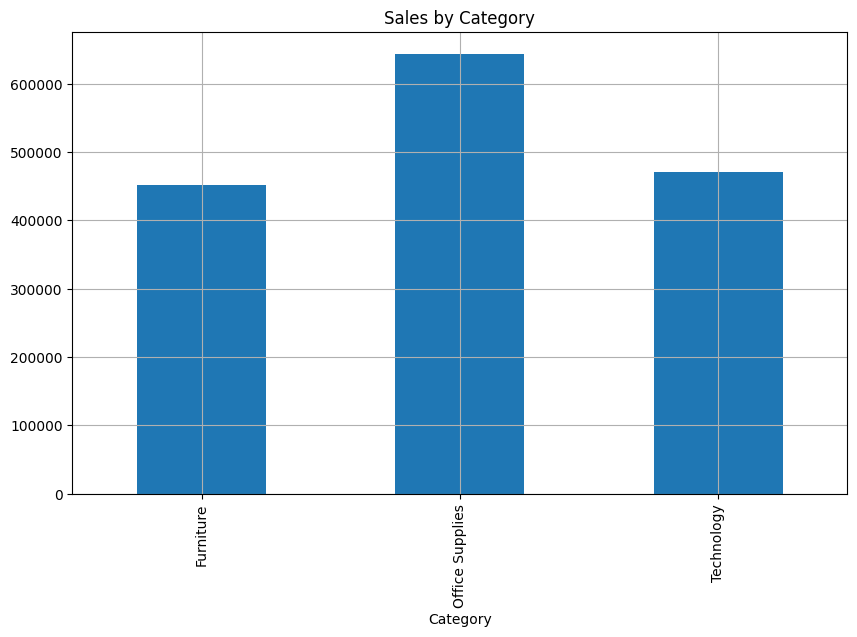

In [ ]:
# 6. Sales by Category

sales_by_category = df.groupby("Category")["Sales"].sum()
sales_by_category.plot(kind='bar')
plt.title("Sales by Category")
plt.show()


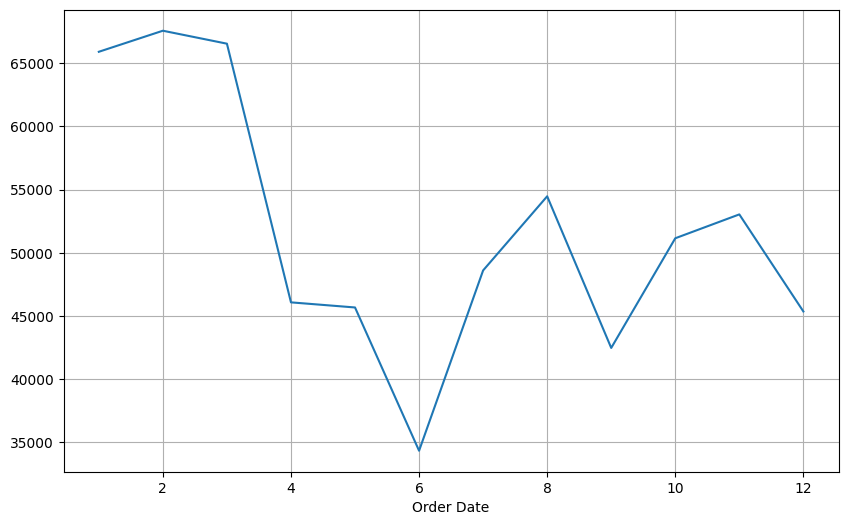

In [ ]:
# 7. Time-Based Sales Trend


df["Order Date"] = pd.to_datetime(df["Order Date"])
df.groupby(df["Order Date"].dt.month)["Sales"].sum().plot()
plt.show()



In [ ]:
# 8. Top Performing Records

top_sales = df.sort_values(by="Sales", ascending=False).head(10)
top_sales


,Order Date,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Payment Mode
430,NaT,Lakewood,New Jersey,East,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930,7,2365.9818,COD
5236,NaT,Newark,Delaware,East,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,5517.970,3,5039.9856,COD
2654,NaT,Jackson,Michigan,Central,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,5455.960,4,2504.2216,COD
1694,2019-04-10,Providence,Rhode Island,East,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,5399.910,9,2591.9568,Cards
4735,2020-05-10,New York City,New York,East,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",5234.960,4,1351.9896,Cards
4809,NaT,Sacramento,California,West,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5107.960,5,1906.4850,COD
254,NaT,San Francisco,California,West,Office Supplies,Supplies,High Speed Automatic Electric Letter Opener,4912.590,3,196.5036,Cards
176,2019-01-03,Yonkers,New York,East,Technology,Machines,Ativa V4110MDD Micro-Cut Shredder,4899.930,7,2400.9657,COD
3093,2020-01-04,San Francisco,California,West,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4823.984,2,359.9988,Cards
93,2019-02-02,Arlington,Virginia,South,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,4749.950,5,2799.9840,COD


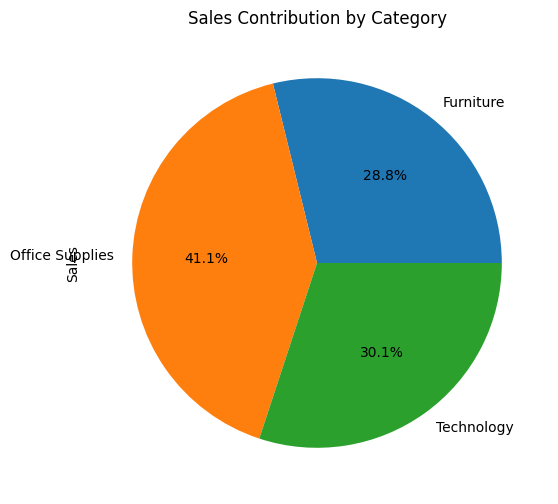

In [ ]:
# 9. Contribution Analysis

contribution = (sales_by_category / total_sales) * 100
contribution.plot(kind='pie', autopct='%1.1f%%')
plt.title("Sales Contribution by Category")
plt.show()
